# Predictions_Analysis

Hate speech, however, continues to be an important challenge, and multimodal hate speech remains an especially difficult machine learning problem. Hate speech is defined as a direct attack (characterized as violent or dehumanizing speech, harmful stereotypes, statements of inferiority, expressions of contempt, disgust or dismissal, cursing, and calls for exclusion or segregation) against people on the basis of what we call protected characteristics (characterized as race, ethnicity, national origin, disability, religious affiliation, caste, sexual orientation, sex, gender identity and serious disease). We operationalize this definition by making fine-grained labels for protected classes and attack types available as additional annotations on the hateful memes dataset.
Task A (multi-label): For each meme, detect the protected category. Protected categories are: race, disability, religion, nationality, sex. If the meme is not_hateful the protected category is: pc_empty.
Task B (multi-label): For each meme, detect the attack type. Attack types are: contempt, mocking, inferiority, slurs, exclusion, dehumanizing, inciting_violence. If the meme is not_hateful the protected category is: attack_empty.

In [270]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

In [18]:
# helpers
def auc_score(org_file, ens_file):
    fpr, tpr, thresholds = metrics.roc_curve(org_file['label'], ens_file['proba'],  pos_label=1)
    return round(metrics.auc(fpr, tpr), 3)

In [332]:
# import dev predictions and dev with annotations of type hateful
dev_seen_results = pd.read_csv("results_analysis/EnsembleV1_dev_seen_RA.csv")

dev_seen = pd.read_json("results_analysis/dev_seen.jsonl", lines = True)
dev_seen_htype = pd.read_json("results_analysis/dev_seen_htype.json", lines = True)
dev_seen_htype['label'] = dev_seen['label']
dev_seen_htype['match_predict'] = dev_seen_results['label'] == dev_seen['label']

## Overall metrics

In [19]:
auc_score(dev_seen, dev_seen_results)

0.805

In [20]:
accuracy_score(dev_seen['label'], dev_seen_results['label'])

0.736

## Metrics by hateful type

- **Protected Category** -> `gold_pc`: *race, disability, religion, nationality, sex*. If the meme is not_hateful the protected category is: *pc_empty*.

- **Attack Type** -> `gold_attack`: *contempt, mocking, inferiority, slurs, exclusion, dehumanizing, inciting_violence*. If the meme is not_hateful the protected category is: *attack_empty*.

In [213]:
ch = []
for gp in dev_seen_htype['gold_attack']:
    if gp == ['attack_empty']:
        ch.append('attack_empty')
    elif gp == ['contempt']:
        ch.append('contempt')
    elif gp == ['mocking']:
        ch.append('mocking')
    elif gp == ['inferiority']:
        ch.append('inferiority')
    elif gp == ['slurs']:
        ch.append('slurs')
    elif gp == ['exclusion']:
        ch.append('exclusion')
    elif gp == ['dehumanizing']:
        ch.append('dehumanizing')
    elif gp == ['inciting_violence']:
        ch.append('inciting_violence')
    else:
        ch.append('multiple')
        
dev_seen_htype['gold_attack2'] = ch

In [333]:
gp_ = []
for gp in dev_seen_htype['gold_pc']:
    if gp == ['pc_empty']:
        gp_.append('pc_empty')
    elif gp == ['race']:
        gp_.append('race')
    elif gp == ['disability']:
        gp_.append('disability')
    elif gp == ['religion']:
        gp_.append('religion')
    elif gp == ['nationality']:
        gp_.append('nationality')
    elif gp == ['sex']:
        gp_.append('sex')
    else:
        gp_.append('multiple')
        
dev_seen_htype['gold_pc'] = gp_

In [207]:
# race, disability, religion, nationality, sex and pc_empty.
dev_seen_htype['gold_pc'] = dev_seen_htype['gold_pc'].map(lambda x: 'pc_empty' if(x == ['pc_empty']) else x)
dev_seen_htype['gold_pc'] = dev_seen_htype['gold_pc'].map(lambda x: 'race' if(x == ['race']) else x)
dev_seen_htype['gold_pc'] = dev_seen_htype['gold_pc'].map(lambda x: 'disability' if(x == ['disability']) else x)
dev_seen_htype['gold_pc'] = dev_seen_htype['gold_pc'].map(lambda x: 'religion' if(x == ['religion']) else x)
dev_seen_htype['gold_pc'] = dev_seen_htype['gold_pc'].map(lambda x: 'nationality' if(x == ['nationality']) else x)
dev_seen_htype['gold_pc'] = dev_seen_htype['gold_pc'].map(lambda x: 'sex' if(x == ['sex']) else x)

In [109]:
dev_seen_htype.groupby('gold_attack2')['label'].count()

gold_attack2
None                  17
attack_empty         257
contempt               8
dehumanizing         108
exclusion              9
inciting_violence     19
inferiority           44
mocking               33
slurs                  5
Name: label, dtype: int64

In [38]:
dev_seen_htype.columns

Index(['id', 'set_name', 'img', 'text', 'gold_hate', 'gold_pc', 'gold_attack',
       'pc', 'attack', 'label'],
      dtype='object')

In [131]:
dev_seen_htype.groupby('gold_attack2')['gold_pc'].count()

gold_attack2
None                  17
attack_empty         257
contempt               8
dehumanizing         108
exclusion              9
inciting_violence     19
inferiority           44
mocking               33
slurs                  5
Name: gold_pc, dtype: int64

In [215]:
bplot=dev_seen_htype.groupby('gold_attack2').agg({'label': 'count'})

In [142]:
dev_seen_htype.groupby('label')['gold_attack2'].count()

label
0    253
1    247
Name: gold_attack2, dtype: int64

In [138]:
bplot.index

Index(['None', 'attack_empty', 'contempt', 'dehumanizing', 'exclusion',
       'inciting_violence', 'inferiority', 'mocking', 'slurs'],
      dtype='object', name='gold_attack2')

## Bar Plot `gold_attack`

<AxesSubplot:xlabel='gold_attack2', ylabel='label'>

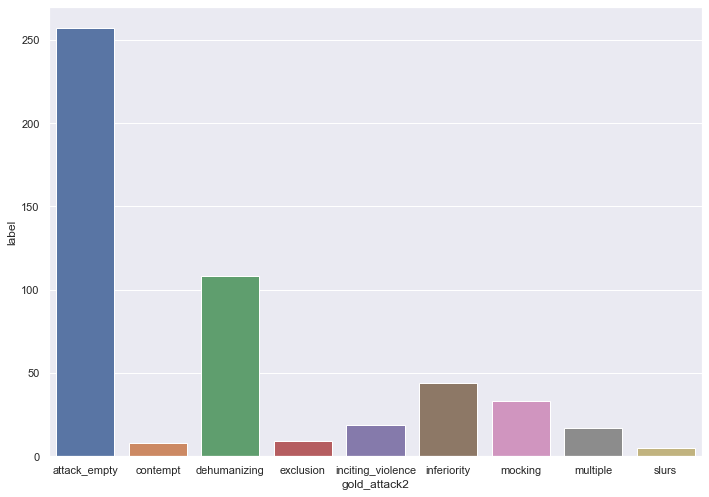

In [216]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=bplot.index, y="label", data=bplot)

## Bar Plot `gold_pc`

In [232]:
bbplot_gold_pc = dev_seen_htype.groupby('gold_pc').agg({'label': 'count'})

<AxesSubplot:xlabel='gold_pc', ylabel='label'>

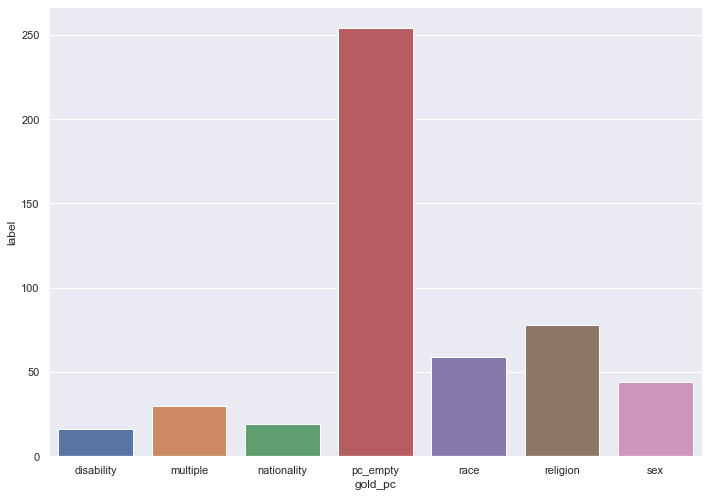

In [233]:
sns.barplot(x=bbplot_gold_pc.index, y="label", data=bbplot_gold_pc)

## Predictions match

In [235]:
confusion_matrix(dev_seen['label'], dev_seen_results['label'])

array([[169,  84],
       [ 48, 199]])

In [342]:
bplot_results = pd.concat([dev_seen_htype.groupby('gold_pc').agg({'label': 'count'}),
     dev_seen_htype.groupby('gold_pc').agg({'match_predict': 'sum'})], axis = 1)
bplot_results['perc'] = bplot_results['match_predict']/bplot_results['label']

bplot_results

,label,match_predict,perc
gold_pc,,,
disability,16,13,0.812500
multiple,30,18,0.600000
nationality,19,14,0.736842
pc_empty,254,182,0.716535
race,59,44,0.745763
religion,78,62,0.794872
sex,44,35,0.795455


In [337]:
# we melt the df in order to use more than one col in barplot
melt_bplot_results = pd.melt(bplot_results)
melt_bplot_results['gold_pc'] = ('disability', 'multiple', 'nationality', 'pc_empty', 'race',
       'religion', 'sex','disability', 'multiple', 'nationality', 'pc_empty', 'race',
       'religion', 'sex')

<AxesSubplot:xlabel='gold_pc', ylabel='value'>

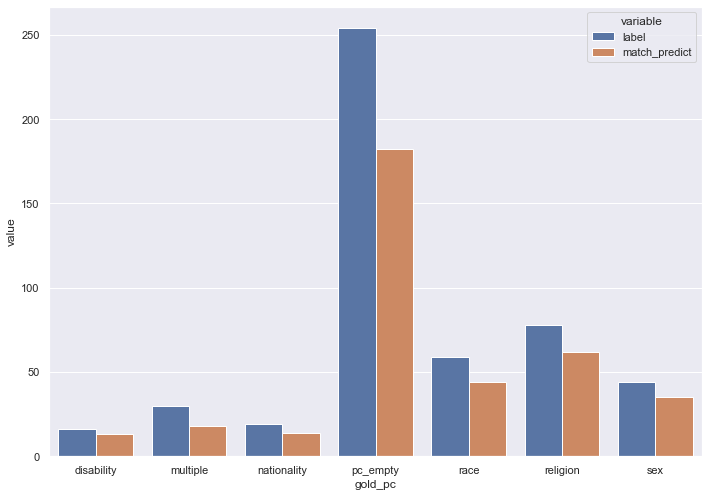

In [338]:
sns.barplot(x= 'gold_pc', y= 'value', hue = 'variable', data=melt_bplot_results)